# <h1 style='background:#EED4E5; border:12; color:black'><center>Sentiment Analysis</center></h1> 

## Sentiment Analysis using  NLP Machine Learning
An application that includes a group of restaurants. 
The goal is to create a machine learning model that helps identify customer comments on food orders, 
whether they are bad or good, where 1comment represents positive and 0 represents negative comment .

In [503]:
import pandas  as pd
import numpy as np
import seaborn as sns
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
%matplotlib inline
sns.set(rc={'figure.figsize': [12, 5]}, font_scale=1.3)
import warnings 
warnings.filterwarnings('ignore')

In [591]:
## loading dataset
df = pd.read_csv('Customers_Comments.csv',sep = ',')

In [592]:
df.head()

,Comment,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Exploring data

In [506]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [507]:
df['Commentlength'] = df['Comment'].apply(len)

<Axes: xlabel='Liked', ylabel='Commentlength'>

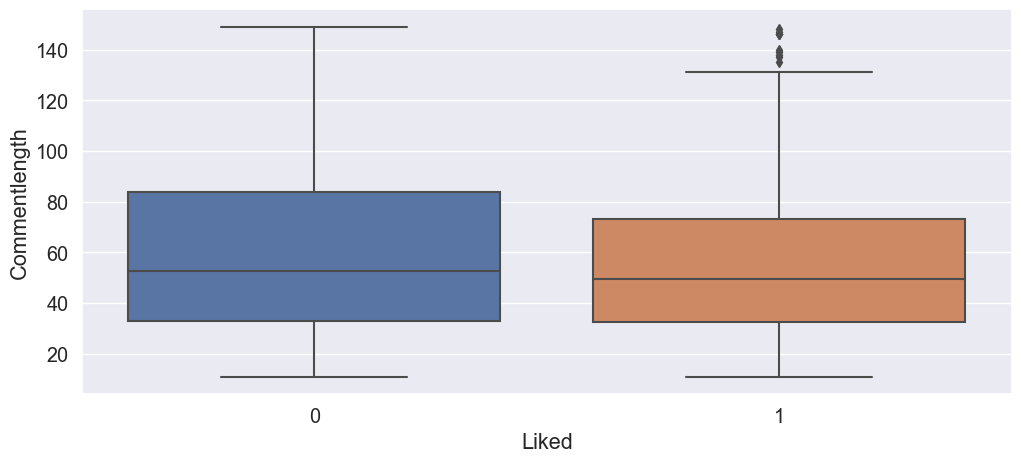

In [508]:
sns.boxplot(df, y = 'Commentlength' , x = 'Liked')

In [509]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [510]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zamzam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import the nltk to find the stopwords

In [566]:
Find_stopwords = stopwords.words('english')
print(Find_stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [512]:
row = df['Comment'][0]
row

'Wow... Loved this place.'

In [513]:
re.sub('[^a-zA-z]',' ',row)

'Wow    Loved this place '

In [548]:
words = re.sub('[^a-zA-z]',' ',row).split()
words

['Wow', 'Loved', 'this', 'place']

In [589]:
lis1 = []
for word in words :
  if word not in Find_stopwords :
    low =  word.lower()
    Stemmer = PorterStemmer()
    lis1.append(low)

In [590]:
' '.join(lis1)

'wow loved place'

## Define function 
to filter the sentence from any verbs, spaces, periods and punctuation

In [608]:
def convert (x) :
  """
  Filter the sentence from any verbs, spaces, periods,
  and punctuation marks using libraries to simplify he sentence for the model,
  so it does not learn words that are not significant or unuseful.
  """
  lis1 = []
  words = re.sub('[^a-zA-z]',' ',x).split()
  for word in words :
    if word.lower() not in Find_stopwords :
      low =  word.lower()
      Stemmer = PorterStemmer()
      lis1.append(low)
  return ' '.join(lis1)

Remove verbs, spaces, periods and punctuation

In [609]:
df['Comment'] = df['Comment'].apply(convert)

In [610]:
df['Comment'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                          selection menu great prices
Name: Comment, dtype: object

## 
Create func to Find the repeated words

In [567]:
def SW (x) :
  """
  Find the repeated words
  """
  lis1 = []
  words = re.sub('[^a-zA-z]',' ',x).split()
  for word in words :
    if word.lower()  in Find_stopwords :
        lis1.append(word.lower())  
  return lis1

In [572]:
stop_word = [SW(i) for i in list(df['Comment'])]
lsi = [ x for i in stop_word for x in i ]  
lsi [:5]

['this', 'is', 'not', 'not', 'and']

In [573]:
from typing import Counter

In [574]:
Repeated = pd.DataFrame(Counter(lsi).items() , columns=['Word','Repeated'])
rep = Repeated[Repeated['Repeated'] > 100]

Text(0.5, 1.0, 'Most common repeated words ')

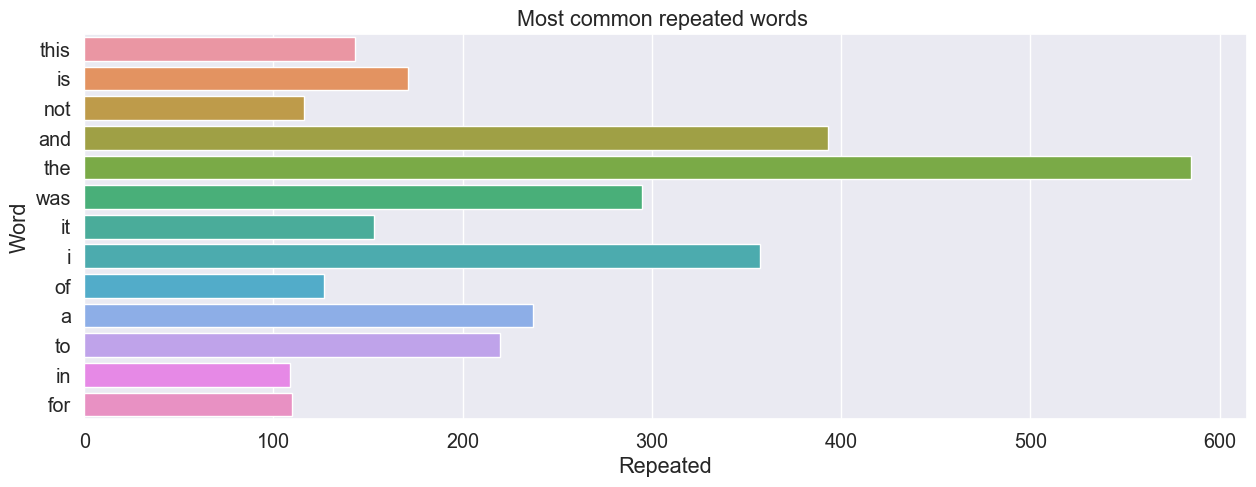

In [575]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(15,5))
my_circle=plt.Circle((0,0), 0.7, color='white')
sns.barplot(y = rep['Word'], x = rep['Repeated'] , data = rep)
plt.title('Most common repeated words ')

In [577]:
df['Comment'].head(5)

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Comment, dtype: object

## Define function 
to filter the sentence from any verbs, spaces, periods and punctuation

After filtering keep it in list 

In [578]:
def convert (x) :
  """
  Filter the sentence from any verbs, spaces, periods,
  and punctuation marks using libraries to simplify he sentence for the model,
  so it does not learn words that are not significant or unuseful.
  """
  lis1 = []
  words = re.sub('[^a-zA-z]',' ',x).split()
  for word in words :
    if word.lower() not in Find_stopwords :
      low =  word.lower()
      Stemmer = PorterStemmer()
      lis1.append(Stemmer.stem(low))
  return ' '.join(lis1)

In [630]:
df['Comment'] = df['Comment'].apply(convert)

In [631]:
df['Comment'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                          selection menu great prices
Name: Comment, dtype: object

Remove verbs, spaces, periods and punctuation

Conversion the sentences to arrays

## Building model using Pipeline



In [525]:
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.preprocessing import FunctionTransformer

In [526]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler

## 
We will try a several algorithms and get the best accuracy to build our model using FunctionTransformer

In [527]:
models = list()
models.append(("DecisionTreeClassifier" , DecisionTreeClassifier(max_depth=6 , max_leaf_nodes=10 , max_features=5)))
models.append(("GaussianNB" , GaussianNB()))
models.append(("LogisticRegression" , LogisticRegression()))
models.append(("KNeighborsClassifier" , KNeighborsClassifier()))
models.append(("XGBClassifier" , XGBClassifier(n_estimators=20)))
models.append(("RandomForestClassifier" , RandomForestClassifier(n_estimators=20)))
models.append(("MultinomialNB" , MultinomialNB()))
models.append(("SVC" , SVC()))
x = df['Comment']
y = df['Liked']

In [528]:
for model in models:
    step = list()
    step.append(('tf',TfidfVectorizer(stop_words = 'english')))
    step.append(('fun',FunctionTransformer(lambda x :x.toarray(),accept_sparse= True)))
    step.append(model)
    pipline = Pipeline(steps = step)
    codec = cross_validate(pipline,x , y, cv = 5 ,return_train_score=True,scoring='accuracy')
    print(model[0])
    print("Train accuracy is ",codec["train_score"].mean())
    print("Test accuracy is " , codec["test_score"].mean())
    print("*" * 50)

DecisionTreeClassifier
Train accuracy is  0.534
Test accuracy is  0.525
**************************************************
GaussianNB
Train accuracy is  0.9492499999999999
Test accuracy is  0.681
**************************************************
LogisticRegression
Train accuracy is  0.9535
Test accuracy is  0.783
**************************************************
KNeighborsClassifier
Train accuracy is  0.64075
Test accuracy is  0.5900000000000001
**************************************************
XGBClassifier
Train accuracy is  0.81325
Test accuracy is  0.735
**************************************************
RandomForestClassifier
Train accuracy is  0.99375
Test accuracy is  0.7579999999999999
**************************************************
MultinomialNB
Train accuracy is  0.96075
Test accuracy is  0.78
**************************************************
SVC
Train accuracy is  0.99375
Test accuracy is  0.781
**************************************************


## We can use XGBClassifier

In [529]:
def func(x):
    x.toarray()

In [530]:
steps = []
steps.append(('tf',TfidfVectorizer(stop_words = 'english')))
steps.append(('fun',FunctionTransformer(lambda x :x.toarray(),accept_sparse= True)))
steps.append(('GaussianNB',XGBClassifier(n_estimators=10)))
pipeline = Pipeline(steps= steps )

In [531]:
x = df['Comment']
y = df['Liked']

In [532]:
pipeline = Pipeline(steps= steps )

In [533]:
model = cross_validate(pipeline,x , y, cv = 10 ,return_train_score=True)


## Evaluating model 

In [444]:
model['test_score'].mean() , model['train_score'].mean()

(0.7259999999999999, 0.776)

In [343]:
sns.lineplot(model['test_score']) 
sns.lineplot(model['train_score'])
plt.title('GaussianNB')

In [448]:
pipeline.fit(x,y)

Pipeline(steps=[('tf', TfidfVectorizer(stop_words='english')),
                ('fun',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001D605E5F9C0>)),
                ('GaussianNB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=10, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [474]:
pipeline.predict(['I love the food as it had prepared well'])

array([1])

In [475]:
pipeline.predict(['I think, It was need some extra spices'])

array([0])

## 
(1) represents positive comment and (0) represents negative comment 

In [137]:
def feed_back(x) : 
    feed = pipeline.predict([x])
    if feed == 0 : 
        return 'negative comment'  
    else : 
        return 'positive comment'

In [138]:
feed_back('I love the food, as it was prepared well')

'positive comment'

In [139]:
feed_back('I think, It was need some extra spices')

'negative comment'

## Using SentimentIntensityAnalyzer

In [148]:
import joblib 

In [487]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix , classification_report


In [615]:
df['Comment']

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: Comment, Length: 1000, dtype: object

In [582]:
analyzer = SentimentIntensityAnalyzer()

In [611]:
# define function to create sentiment result
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

In [633]:
df['sentiment'] = df['Comment'].apply(get_sentiment)

In [598]:
df

,Comment,Liked,sentiment
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,0
2,Not tasty and the texture was just nasty.,0,0
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
...,...,...,...
995,I think food should have flavor and texture an...,0,0
996,Appetite instantly gone.,0,0
997,Overall I was not impressed and would not go b...,0,0
998,"The whole experience was underwhelming, and I ...",0,0


In [636]:
print(classification_report(df['Liked'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       500
           1       0.70      0.83      0.76       500

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000



As we see the accuracy between is .73 that's great comparable with XGBClassifier

## Saving the model 
to add in the deploy it at the app to give the reviews automatically to the restaurant

In [622]:
def getsentiment(x) : 
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(x)
    if scores['pos'] > 0 : 
        print('positive comment')
    
    else : 
        print('negative comment')

In [623]:
getsentiment('I love the food, as it was prepared well')

positive comment


In [624]:
getsentiment('I think, It was need some extra spices')


negative comment


In [625]:
joblib.dump(getsentiment ,'getsentiment.pkl')

['getsentiment.pkl']

In [626]:
model = joblib.load('getsentiment.pkl')

In [627]:
model('good service')
model('pathetice food')

positive comment
negative comment


Add a deployment in the app to automatically give reviews to the restaurant

Transfered to the app developper !!!!!!!!!!!!!!!!!!!!!!